In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KalmanFilters:
    
    def __init__(self,x0,P0,A,B,C,Q,R):
        
        self.x0=x0
        self.P0=P0
        self.A=A
        self.B=B
        self.C=C
        self.Q=Q
        self.R=R
        
        self.currentTimeStep=0
        self.estimates_aposteriori=[]
        self.estimates_aposteriori.append(x0)
        self.estimates_apriori=[]
        
        self.estimate_covarianceMatricesAposteriori=[]
        self.estimate_covarianceMatricesAposteriori.append(P0)
        
        self.estimate_covarianceMatriceApriori=[]
        
        self.gainMatrice=[]
        
        self.errors=[]
        
    def propagateDynamics(self,inputValue):
        
        xk_minus=self.A*self.estimates_aposteriori[self.currentTimeStep]+self.B*inputValue
        Pk_minus=self.A*self.estimate_covarianceMatriceApriori[self.currentTimeStep]*self.A.T+self.Q
        
        self.estimates_apriori.append(xk_minus)
        self.estimate_covarianceMatriceApriori.append(Pk_minus)
        
        self.currentTimeStep+=1
        
        
    def computeAposterioriEstimate(self,currentMeasurement):
        
        kk=self.estimate_covarianceMatriceApriori[self.currentTimeStep-1]*(self.C.T)*np.linalg.inv(self.R+self.C*self.estimate_covarianceMatriceApriori[self.currentTimeStep-1]*(self.C.T))
        
        error_k=currentMeasurement-self.C*self.estimates_apriori[self.currentTimeStep-1]
        
        xk_plus=self.estimates_apriori[self.currentTimeStep-1]+kk*error_k
        
        lminuskkC=np.matrix(np.eye(self.x0.shape[0]))-kk*self.C
        
        Pk_plus=lminuskkC*self.estimate_covarianceMatriceApriori[self.currentTimeStep-1]*(lminuskkC.T)+kk(self.R)*kk.T
        
        
        self.gainMatrice.append(kk)
        self.errors.qppend(error_k)
        self.estimates_aposteriori.append(xk_plus)
        self.estimate_covarianceMatricesAposteriori.append(Pk_plus)
        
        
        

In [12]:
h=0.1
initialPosition=10
initialVelocity=-5

acceleration=0.5

noiseStd=1;
numberTimeSteps=100

In [9]:
A=np.matrix([[1,h,0.5*(h**2)],[0, 1, h],[0,0,1]])
B=np.matrix([[0],[0],[0]])
C=np.matrix([[1,0,0]])
 
R=1*np.matrix([[1]])
Q=np.matrix(np.zeros((3,3)))
 
x0=np.matrix([[0],[0],[0]])
P0=1*np.matrix(np.eye(3))

In [10]:
timeVector=np.linspace(0,(numberTimeSteps-1)*h,numberTimeSteps)
 
position=np.zeros(np.size(timeVector))
velocity=np.zeros(np.size(timeVector))
 
for i in np.arange(np.size(timeVector)):
    position[i]=initialPosition+initialVelocity*timeVector[i]+(acceleration*timeVector[i]**2)/2
    velocity[i]=initialVelocity+acceleration*timeVector[i]
     
positionNoisy=position+noiseStd*np.random.randn(np.size(timeVector))

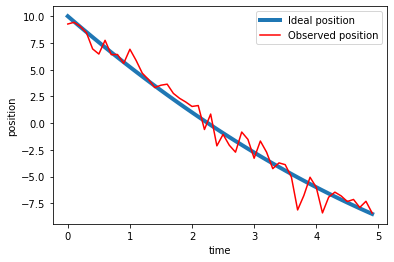

In [11]:
plotStep=numberTimeSteps//2
plt.plot(timeVector[0:plotStep],position[0:plotStep],linewidth=4, label='Ideal position')
plt.plot(timeVector[0:plotStep],positionNoisy[0:plotStep],'r', label='Observed position')
plt.xlabel('time')
plt.ylabel('position')
plt.legend()
plt.savefig('data.png',dpi=300)
plt.show()